In [23]:
import hist
import boost_histogram as bh
import numpy as np
import functools
import operator
import itertools
import math
import mplhep as hep
import matplotlib.pyplot as plt

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f1a21a57790>, errorbar=None, legend_artist=None)]

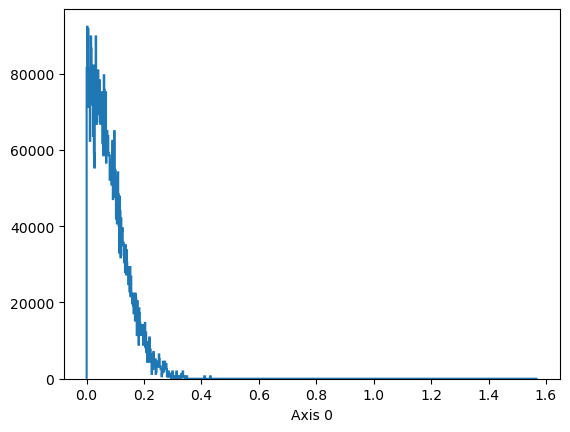

In [26]:
h= hist.Hist(hist.axis.Regular(bins=1000, start=0.00000001, stop=math.pi/2, #transform=hist.axis.transform.sqrt
))
h.fill(np.abs(np.random.normal(scale=0.1, size=10000)))
hep.histplot(h, yerr=False, binwnorm=1.)
#plt.xscale("log")

In [29]:
np.count_nonzero(hist.axis.Regular(bins=1000, start=0.00000001, stop=math.pi/2, transform=hist.axis.transform.sqrt
).centers < 0.5)

564

In [7]:
h = hist.Hist(hist.axis.Regular(bins=10, start=0, stop=10, name="r"), storage=hist.storage.WeightedMean())
h.fill([5, 8, 5], sample=[50, 20, 30], weight=[2, 3, 4])
h

Hist(Regular(10, 0, 10, name='r'), storage=WeightedMean()) # Sum: WeightedMean(sum_of_weights=9, sum_of_weights_squared=29, value=31.1111, variance=188.462)

In [10]:
acc = bh.accumulators.WeightedMean()
acc.fill([50, 20, 30], weight=[2, 3, 4])
acc

WeightedMean(sum_of_weights=9, sum_of_weights_squared=29, value=31.1111, variance=188.462)

In [19]:
h[{0:0}]

WeightedMean(sum_of_weights=0, sum_of_weights_squared=0, value=0, variance=-nan)

In [6]:
rechits_distanceToBarycenter_axis = hist.axis.Regular(name="rechits_distanceToBarycenter", label="Distance of rechits to barycenter (cm)",
    start=0, stop=10., bins=30)
r_axis = rechits_distanceToBarycenter_axis

In [39]:
len(np.unique(rechits_distanceToBarycenter_axis.widths.round(decimals=3)))

1

In [37]:
rechits_distanceToBarycenter_axis.widths

array([0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333])

In [20]:
h = hist.Hist(
    hist.axis.Regular(bins=10, start=0, stop=10, name="x"),
    hist.axis.Regular(bins=10, start=0, stop=10, name="y"),
    hist.axis.StrCategory(["allTracksters", "mainTrackster"], name="mainOrAllTracksters")
)
h.fill(x=[1, 3, 1, 6], y=[3, 8, 4, 8], mainOrAllTracksters=["allTracksters", "mainTrackster", "mainTrackster", "mainTrackster"])

Hist(
  Regular(10, 0, 10, name='x'),
  Regular(10, 0, 10, name='y'),
  StrCategory(['allTracksters', 'mainTrackster'], name='mainOrAllTracksters'),
  storage=Double()) # Sum: 4.0

In [26]:
h[{2:"mainTrackster"}] = (h[{2:"mainTrackster"}]*2).view()

In [29]:
stack = h.stack("mainOrAllTracksters")
stack["mainTrackster"] *= 2
stack

Stack<('allTracksters', 'mainTrackster') of Hist(
  Regular(10, 0, 10, name='x'),
  Regular(10, 0, 10, name='y'),
  storage=Double()) # Sum: 1.0>

In [3]:
h[{"y":slice(hist.loc(1), hist.loc(9), sum), "mainOrAllTracksters":hist.loc("mainTrackster")}]

Hist(Regular(10, 0, 10, name='x'), storage=Double()) # Sum: 3.0

In [4]:
cluster2D_rho_axis = hist.axis.Regular(bins=100, start=0, stop=20., name="clus2D_rho", label="2D cluster rho (local energy density)", transform=hist.axis.transform.sqrt)

In [5]:
h = hist.Hist(cluster2D_rho_axis)
h.fill([3.587443,  0.105543,7.573667,16.626007,0.150658,26.937487,0.099589,41.380047,0.063965,0.125424])

Hist(Regular(100, 0, 20, transform=sqrt, name='clus2D_rho', label='2D cluster rho (local energy density)'), storage=Double()) # Sum: 8.0 (10.0 with flow)

In [37]:
h = hist.Hist(hist.axis.Integer(start=0, stop=10, name="x"))
h.fill([0, 1, 1, 5, 15, 20, 9])
h

Hist(Integer(0, 10, name='x'), storage=Double()) # Sum: 5.0 (7.0 with flow)

In [40]:
h.axes[0].centers-1

array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5])

In [41]:
h.axes[0].centers

array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5])

In [7]:
h[{"x":slice(hist.loc(3), None, sum)}]
h.axes[0].edges[:-1]

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [8]:
beamEnergiesAxis = hist.axis.IntCategory([20, 50, 80, 100, 120, 150, 200, 250, 300], name="beamEnergy", label="Beam energy (GeV)")

In [9]:
issubclass(type(beamEnergiesAxis), bh.axis.IntCategory)

True

In [10]:
beamEnergiesAxis.size

9

In [11]:
h = hist.Hist(
    hist.axis.Regular(bins=10, start=0, stop=10, name="x"),
    beamEnergiesAxis
)
h.fill(x=[0, 0, 1, 3, 1, 6, 3, 8, 4, 8], beamEnergy=20)

Hist(
  Regular(10, 0, 10, name='x'),
  IntCategory([20, 50, 80, 100, 120, 150, 200, 250, 300], name='beamEnergy', label='Beam energy (GeV)'),
  storage=Double()) # Sum: 10.0

In [12]:
h[{"beamEnergy":hist.loc(50)}]

Hist(Regular(10, 0, 10, name='x'), storage=Double())

In [13]:
h = hist.Hist(
    hist.axis.Regular(bins=20, start=0, stop=10, name="x"),
    beamEnergiesAxis,
    storage=hist.storage.Weight()
)
h.fill(x=[0, 0, 1, 3, 1, 6, 3, 8, 4, 8], beamEnergy=20, weight=[1, 2, 1, 3, 1, 6, 3, 8, 4, 1])
h.fill(x=[5, 2, 1, 3, 1, 3, 3, 8, 4], beamEnergy=80, weight=[2, 1, 3, 1, 6, 3, 8, 4, 1])

Hist(
  Regular(20, 0, 10, name='x'),
  IntCategory([20, 50, 80, 100, 120, 150, 200, 250, 300], name='beamEnergy', label='Beam energy (GeV)'),
  storage=Weight()) # Sum: WeightedSum(value=59, variance=283)

In [14]:
total = np.sum(h.values()) * functools.reduce(operator.mul, h.axes.widths)
total
h.values() / np.where(total > 0, total, 1)


array([[0.10169492, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.06779661, 0.        , 0.30508475, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.03389831, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.20338983, 0.        , 0.40677966, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],


In [15]:
h3 = hist.Hist(
    hist.axis.Regular(name="x", bins=2, start=0, stop=2),
    hist.axis.Variable([0, .1, 1], name="y")
)
h3.fill(x=[0, 0.8, 1, 1], y=[0, 0.05, 0.9, 0.9])

Hist(
  Regular(2, 0, 2, name='x'),
  Variable([0, 0.1, 1], name='y'),
  storage=Double()) # Sum: 4.0

In [16]:
h3.density()

array([[5.        , 0.        ],
       [0.        , 0.55555556]])

In [17]:
hist.axis.Variable([1, 2, 3, 4, 5, 5.5, 6], name="z").widths

array([1. , 1. , 1. , 1. , 0.5, 0.5])

In [18]:
from bokeh.plotting import figure, show
import bokeh.models
import bokeh
bokeh.io.output_notebook()

Loading BokehJS ...

In [19]:
h = hist.Hist(
    hist.axis.Regular(bins=2, start=0, stop=15, name="x"),
    hist.axis.Regular(bins=3, start=0, stop=10, name="y"),
)
h.fill(x=[1, 3, 1, 6, 9, 1, 4], y=[3, 8, 4, 8, 7, 2, 1],)
h

Hist(
  Regular(2, 0, 15, name='x'),
  Regular(3, 0, 10, name='y'),
  storage=Double()) # Sum: 7.0

In [20]:
f = figure()
axes = h.axes
f.image(image=[np.transpose(h.values())], x=axes[0].edges[0], y=axes[1].edges[0],
            dw=axes[0].edges[-1]-axes[0].edges[0], dh=axes[1].edges[-1]-axes[1].edges[0], 
            #color_mapper=bokeh.models.LinearColorMapper(palette="Spectral11")
            )
show(f)

In [21]:
np.transpose(h.values())

array([[3., 0.],
       [1., 0.],
       [2., 1.]])

In [13]:
hist.axis.StrCategory(["allTracksters", "mainTrackster"], name="mainOrAllTracksters").size

2

In [83]:
h = hist.Hist(
    hist.axis.Regular(bins=2, start=0, stop=10, name="x"),
    hist.axis.Regular(bins=3, start=0, stop=10, name="y"),
    storage=hist.storage.WeightedMean()
)
h.fill(x=[1, 3, 1, 6, 9, 2, 5], y=[3, 8, 4, 8, 5, 2, 3], weight=[3, 8, 4, 8, 5, 2, 3], sample=np.array([1, 3, 1, 6, 9, 2, 5])*100)
h

Hist(
  Regular(2, 0, 10, name='x'),
  Regular(3, 0, 10, name='y'),
  storage=WeightedMean()) # Sum: WeightedMean(sum_of_weights=33, sum_of_weights_squared=191, value=433.333, variance=86481.1)

In [84]:
new_view = h[{"y":1}].view(flow=True)
new_view.value *= 10
new_view._sum_of_weighted_deltas_squared *= 0.5
h[{"y":1}] = new_view
h

Hist(
  Regular(2, 0, 10, name='x'),
  Regular(3, 0, 10, name='y'),
  storage=WeightedMean()) # Sum: WeightedMean(sum_of_weights=33, sum_of_weights_squared=191, value=1769.7, variance=1.1396e+07)

In [69]:
h[{"y":1}].view(flow=True)

WeightedMeanView(
      [(0.,  0.,   0., 0.), (4., 16., 100., 0.), (5., 25., 900., 0.),
       (0.,  0.,   0., 0.)],
      dtype=[('sum_of_weights', '<f8'), ('sum_of_weights_squared', '<f8'), ('value', '<f8'), ('_sum_of_weighted_deltas_squared', '<f8')])

In [40]:
h.axes[0].bin(1)

(5.0, 10.0)